# Part 3: Data Analytics

## Step 1: Select a real-world dataset

For this part of the coursework, it was my job to find a dataset that contained at least 5 columns and 150 rows on a subject of my choice. Due to the effect of the pandemic on the mental health of societies worldwide, I felt that it would be interesting to investigate the world happiness index of 2020. In this research project, I am going to analyse and test some hypotheses that I have about the data that I have found. 

I found my dataset on Kaggle, url = https://www.kaggle.com/mathurinache/world-happiness-report.

This data set comprises of 20 columns and 153 rows. There are two columns, 'Country Name' and 'Regional Indicator' whose content comprise of strings (nominal data) and the rest of the columns comprise of numerical data. The csv file is ordered as a rank from the country with the highest happiness index to the country with the lowest.  A proportion of the columns give numerical values that represent a part of society that contributes to making it happy or sad. Examples include 'logged GDP per capita', 'Healthy life expectancy', 'Perceptions of corruption', etc. The other proportion of columns include 'upperwhisker' and 'lowerwhisker' of boxplots, 'standard error of ladder score' and these types of columns include statistical information that we will be using throughout this analysis. 

Countries and regions are going to be two variables that are going to be interesting to see. It is going to be crucial to discover whether there is any correlation about what region you are in and whether that has any correlation to your ranking. More variables of interest are of course life expectancy, perceptions of corruption and freedom. It will be interesting to see if there are any patterns in the data that we can explore further.

As explained earlier, I found this dataset on kaggle, the hyperlink to the original webpage is above. I downloaded the zip file that this dataset was stored in, and then uploaded the 2020.csv file onto Jupyter. 

In [1]:
#Firstly, I need to import all the Python libraries that I will be using... I am sure there will be more to install.
import csv
import pandas as pd
import numpy as np
import scipy as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2: Perform data preparation & cleaning

I am going to load my csv file into a dataframe using Pandas.

In [2]:
df=pd.read_csv('2020.csv')
df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


In [10]:
len(df) #Number of rows

153

In [11]:
len(df.columns) #Number of columns

20

I am going to use the describe function to give me the count, mean, standard deviation, minimum, quartiles and maximum values of the data in each column of our chosen dataframe. 

In [ ]:
df.describe()

I am going to show the first ten and last ten columns of my dataframe, using ```df.head(10)``` and ```df.tail(10)```.

In [ ]:
df.head(10)

In [ ]:
df.tail(10)

In [ ]:

plt.boxplot()

## Step 3: Perform exploratory analysis and ask questions

Firstly, I am going to explore distributions of numeric columns of my dataframe.

(array([11., 26., 37., 28., 29., 13.,  5.,  1.,  1.,  2.]),
 array([-0.30090737, -0.21475024, -0.1285931 , -0.04243596,  0.04372118,
         0.12987831,  0.21603545,  0.30219259,  0.38834972,  0.47450686,
         0.560664  ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

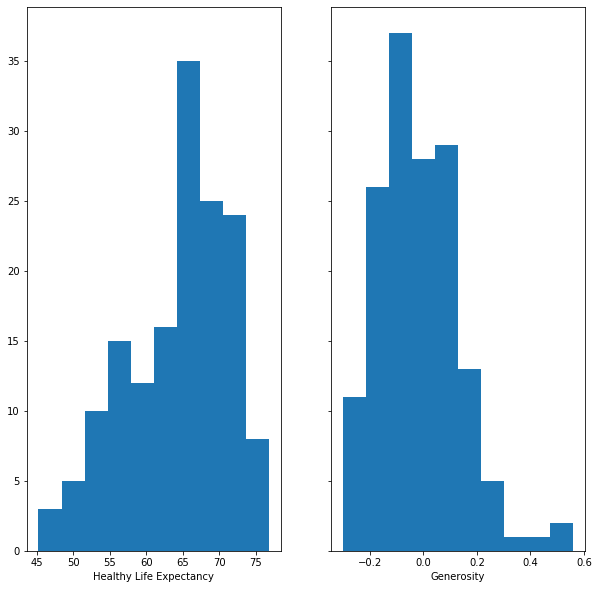

In [16]:
fig = plt.figure()
fig, (ax0,ax1)=plt.subplots(nrows=1,ncols=2,sharey=True,figsize=(10,10))
ax0.set_xlabel("Healthy Life Expectancy")
ax1.set_xlabel("Generosity")
ax0.hist(df['Healthy life expectancy'])
ax1.hist(df['Generosity'])

In [ ]:
df1 = df.head(10)
countries = df1['Country name']
xs = range(len(countries))
plt.bar(xs,df1['Healthy life expectancy'])
plt.xticks(np.arange(0,10,step=0.00001))
plt.xticks(xs,countries,rotation = 'vertical')
plt.ylabel('Healthy Life Expectancy')
plt.xlabel('Top Ten Happiest Countries')
df1

#### Question 1: Is Generosity and Healthy life expectancy correlated for countries in sub-saharan African?

This requires us to plot a line of reggression between these two variables within sub-saharan African countries.

-0.5246061484479272


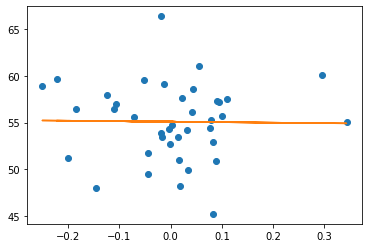

In [13]:
condition2 = df['Regional indicator']=='Sub-Saharan Africa'
ssafrica_hle = df.loc[condition2,:]
x_1 = df.loc[condition2,:]
x = x_1['Generosity']
y = x_1['Healthy life expectancy']
plt.plot(x,y,'o')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)
print(m)

We can see that m = -0.525 (3.d.p) this implies an every so slight negative gradient. So this is a slightly negative correlation between Generosity and Healthy life expectancy in sub-saharan africa. 

#### Question 2: The mean Healthy life expectancy in Western Europe is better than in North America?

We want to test this hypothesis by using a suitable test. We take our significan level to be set at 0.05 each tail. We want to locate the data that we will be using to find an average healthy life expectancy.  

In [30]:
condition1 = df['Regional indicator'] == 'Western Europe'
western_hle = df.loc[condition1,:]
df.loc[condition1,:]

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266
5,Netherlands,Western Europe,7.4489,0.027792,7.503372,7.394428,10.812712,0.939139,72.300919,0.908548,0.207612,0.364717,1.972317,1.338946,1.463646,0.975675,0.613626,0.336318,0.368570,2.352117
6,Sweden,Western Europe,7.3535,0.036234,7.424519,7.282481,10.758794,0.926311,72.600769,0.939144,0.111615,0.250880,1.972317,1.322235,1.433348,0.986470,0.650298,0.272828,0.442066,2.246299
8,Austria,Western Europe,7.2942,0.033365,7.359596,7.228804,10.742824,0.928046,73.002502,0.899989,0.085429,0.499955,1.972317,1.317286,1.437445,1.000934,0.603369,0.255510,0.281256,2.398446
9,Luxembourg,Western Europe,7.2375,0.030852,7.297970,7.177031,11.450681,0.906912,72.599998,0.905636,-0.004621,0.367084,1.972317,1.536676,1.387528,0.986443,0.610137,0.195954,0.367041,2.153700
12,United Kingdom,Western Europe,7.1645,0.037162,7.237338,7.091663,10.600135,0.936683,72.301605,0.834744,0.263732,0.435916,1.972317,1.273061,1.457845,0.975700,0.525169,0.373433,0.322602,2.236722


In [31]:
condition2 = df['Regional indicator']=='Sub-Saharan Africa'
ssafrica_hle = df.loc[condition2,:]
df.loc[condition2,:]

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
48,Mauritius,Sub-Saharan Africa,6.1013,0.057226,6.213464,5.989136,9.956786,0.910358,66.404343,0.889535,-0.018319,0.805343,1.972317,1.073664,1.395667,0.763389,0.590838,0.186895,0.084088,2.006721
84,Ivory Coast,Sub-Saharan Africa,5.2333,0.073096,5.376567,5.090033,8.225561,0.658049,49.503773,0.727909,-0.043991,0.790772,1.972317,0.537094,0.799727,0.154943,0.397123,0.169916,0.093496,3.081023
85,Benin,Sub-Saharan Africa,5.2160,0.077759,5.368408,5.063592,7.674320,0.468671,54.312466,0.735183,-0.003537,0.740533,1.972317,0.366245,0.352428,0.328063,0.405840,0.196670,0.125932,3.440810
87,Congo (Brazzaville),Sub-Saharan Africa,5.1944,0.077029,5.345376,5.043423,8.536987,0.640228,57.924480,0.719059,-0.123674,0.751779,1.972317,0.633617,0.757636,0.458101,0.386514,0.117216,0.118671,2.722620
90,Ghana,Sub-Saharan Africa,5.1480,0.058635,5.262924,5.033076,8.350645,0.728601,57.203987,0.794797,0.094171,0.847965,1.972317,0.575862,0.966368,0.432162,0.477290,0.261291,0.056570,2.378437
97,Cameroon,Sub-Saharan Africa,5.0849,0.067296,5.216800,4.953000,8.118648,0.700386,52.704941,0.763052,-0.001496,0.851337,1.972317,0.503958,0.899726,0.270190,0.439242,0.198020,0.054393,2.719371
100,Senegal,Sub-Saharan Africa,4.9808,0.052769,5.084228,4.877373,8.118982,0.723616,59.599152,0.690596,-0.052335,0.808785,1.972317,0.504062,0.954593,0.518392,0.352401,0.164397,0.081866,2.405124
101,Guinea,Sub-Saharan Africa,4.9493,0.073042,5.092463,4.806137,7.750990,0.637573,54.467800,0.706847,0.076328,0.761794,1.972317,0.390008,0.751366,0.333655,0.371878,0.249491,0.112205,2.740730
102,Niger,Sub-Saharan Africa,4.9096,0.077208,5.060928,4.758272,6.842167,0.617435,53.500095,0.759772,0.013861,0.722530,1.972317,0.108330,0.703800,0.298816,0.435312,0.208177,0.137555,3.017631
107,Gabon,Sub-Saharan Africa,4.8293,0.060268,4.947426,4.711174,9.680537,0.787887,59.715340,0.704829,-0.222262,0.849151,1.972317,0.988044,1.106398,0.522575,0.369460,0.052014,0.055805,1.735028


So we have now create two new datasets that just contain the information for Western Europe and Sub-Saharan Africa. We need to use these new dataframes to conduct our hypothesis test.

Let $\mu_1=$ Mean Healthy Life Expectancy for Western Europe.

$\mu_2=$Mean Healthy Life Expectancy for Sub-Saharan Africa. 

Then we have that:

* $H_0:~\mu_1-\mu_2=0$
* $H_1:`\mu_1-\mu_2>0$

In [32]:
import scipy as stats
we = western_hle['Healthy life expectancy']
ssa = ssafrica_hle['Healthy life expectancy']
stats.stats.ttest_ind(we,ssa,equal_var=False)

Ttest_indResult(statistic=26.104895919978162, pvalue=8.853417796311672e-28)

Since p vaule is $\leq 0.05$ we successfully reject the null hypothesis. There is statistical evidence to suggest that the mean life expectancy in Western Europe is better than that of Sub-Saharan Africa.

This leads us to ask other questions about our data and perform more hypothesis tests.

#### Question 3: Predicting which region a country is from based on logged GDP per capita. Which machine learning algorithm does a better job?

In this section, I will be comparing two Machine learning algorithms, Logistic Regression and the Perceptron algorithm, to see which is better at predicting which region a country is from based on logged GDP per capita. 

Firstly, I want to create a new and easier dataframe to work with using our original dataframe, only including the two variables, region and logged GDP per capita.  

In [62]:
df_ml = df[['Country name','Regional indicator','Logged GDP per capita']]
df_ml.head(10)

,Country name,Regional indicator,Logged GDP per capita
0,Finland,Western Europe,10.639267
1,Denmark,Western Europe,10.774001
2,Switzerland,Western Europe,10.979933
3,Iceland,Western Europe,10.772559
4,Norway,Western Europe,11.087804
5,Netherlands,Western Europe,10.812712
6,Sweden,Western Europe,10.758794
7,New Zealand,North America and ANZ,10.500943
8,Austria,Western Europe,10.742824
9,Luxembourg,Western Europe,11.450681


In [63]:
df_ml.describe()

,Logged GDP per capita
count,153.000000
mean,9.295706
std,1.201588
min,6.492642
25%,8.350645
50%,9.456313
75%,10.265124
max,11.450681


In [64]:
# We need to now to assign variables to our data
x = np.array(df_ml['Logged GDP per capita'].values)
y = np.array(df_ml['Regional indicator'].values)

I have now created a new dataframe which has the columns of interest as you can see above! Further, I have used the built-in describe function to summarise the data using different metrics. Assigned an x,y variable to my data too. Now I need to load my machine learning algorithms from scikit-learn to conduct the analysis. 

In [74]:
#Firstly, we try to predict the freedom to make life choices based on logged gdp per capita using logistic regression
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,r2_score
from sklearn.model_selection import train_test_split

model1 = LogisticRegression(fit_intercept=True)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [75]:
model1.fit(x_train.reshape(-1,1),y_train.reshape(-1,1))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [76]:
y_pred_LR = model1.predict(x_test.reshape(-1,1))
y_pred_LR

array(['Sub-Saharan Africa', 'Sub-Saharan Africa', 'Sub-Saharan Africa',
       'Sub-Saharan Africa', 'Sub-Saharan Africa', 'Sub-Saharan Africa',
       'Sub-Saharan Africa', 'Sub-Saharan Africa', 'Sub-Saharan Africa',
       'Latin America and Caribbean', 'Sub-Saharan Africa',
       'Sub-Saharan Africa', 'Latin America and Caribbean',
       'Sub-Saharan Africa', 'Sub-Saharan Africa', 'Sub-Saharan Africa',
       'Sub-Saharan Africa', 'Sub-Saharan Africa', 'Sub-Saharan Africa',
       'Sub-Saharan Africa', 'Sub-Saharan Africa', 'Sub-Saharan Africa',
       'Sub-Saharan Africa', 'Sub-Saharan Africa', 'Sub-Saharan Africa',
       'Latin America and Caribbean', 'Latin America and Caribbean',
       'Sub-Saharan Africa', 'Sub-Saharan Africa', 'Sub-Saharan Africa',
       'Sub-Saharan Africa', 'Sub-Saharan Africa', 'Sub-Saharan Africa',
       'Sub-Saharan Africa', 'Sub-Saharan Africa', 'Sub-Saharan Africa',
       'Sub-Saharan Africa', 'Sub-Saharan Africa', 'Sub-Saharan Africa',
       '

In [77]:
print('The accuracy of Logistic Rogression at predicting a countries region based on logged GDP per capita is: ' 
      ,model1.score(x_test.reshape(-1,1),y_test.reshape(-1,1)))

The accuracy of Logistic Rogression at predicting a countries region based on logged GDP per capita is:  0.2391304347826087


In [81]:
confusion = metrics.confusion_matrix(y_test.reshape(-1,1),model1.predict(x_test.reshape(-1,1)))
class_report = metrics.classification_report(y_test.reshape(-1,1),model1.predict(x_test.reshape(-1,1)))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [82]:
print(confusion)
print(class_report)

[[ 0  0  0  0  0  0  0  6  0]
 [ 0  0  0  0  0  0  0  3  0]
 [ 0  0  0  0  0  0  0  5  0]
 [ 0  0  1  0  0  0  0  3  0]
 [ 0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  2  0]
 [ 0  0  1  0  0  0  0  3  0]
 [ 0  0  0  0  0  0  0 11  0]
 [ 0  0  3  0  0  0  0  7  0]]
                                    precision    recall  f1-score   support

        Central and Eastern Europe       0.00      0.00      0.00         6
Commonwealth of Independent States       0.00      0.00      0.00         3
       Latin America and Caribbean       0.00      0.00      0.00         5
      Middle East and North Africa       0.00      0.00      0.00         4
             North America and ANZ       0.00      0.00      0.00         1
                        South Asia       0.00      0.00      0.00         2
                    Southeast Asia       0.00      0.00      0.00         4
                Sub-Saharan Africa       0.27      1.00      0.42        11
                    Western Europe       0.0

In [85]:
from sklearn.linear_model import Perceptron
model2 = Perceptron()

model2.fit(x_train.reshape(-1,1),y_train.reshape(-1,1))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [87]:
y_pred_LR = model2.predict(x_test.reshape(-1,1))
y_pred_LR

array(['Commonwealth of Independent States',
       'Commonwealth of Independent States',
       'Commonwealth of Independent States',
       'Commonwealth of Independent States',
       'Commonwealth of Independent States',
       'Commonwealth of Independent States',
       'Commonwealth of Independent States',
       'Commonwealth of Independent States',
       'Commonwealth of Independent States',
       'Commonwealth of Independent States',
       'Commonwealth of Independent States',
       'Commonwealth of Independent States',
       'Commonwealth of Independent States',
       'Commonwealth of Independent States',
       'Commonwealth of Independent States',
       'Commonwealth of Independent States',
       'Commonwealth of Independent States',
       'Commonwealth of Independent States',
       'Commonwealth of Independent States',
       'Commonwealth of Independent States',
       'Commonwealth of Independent States',
       'Commonwealth of Independent States',
       'Co

In [90]:
print('The accuracy of the Perceptron algorithm at predicting a countries region based on logged GDP per capita is: ' 
      ,model2.score(x_test.reshape(-1,1),y_test.reshape(-1,1)))

The accuracy of the Perceptron algorithm at predicting a countries region based on logged GDP per capita is:  0.06521739130434782


In [91]:
confusion = metrics.confusion_matrix(y_test.reshape(-1,1),model1.predict(x_test.reshape(-1,1)))
class_report = metrics.classification_report(y_test.reshape(-1,1),model1.predict(x_test.reshape(-1,1)))

print(confusion)
print(class_report)

[[ 0  0  0  0  0  0  0  6  0]
 [ 0  0  0  0  0  0  0  3  0]
 [ 0  0  0  0  0  0  0  5  0]
 [ 0  0  1  0  0  0  0  3  0]
 [ 0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  2  0]
 [ 0  0  1  0  0  0  0  3  0]
 [ 0  0  0  0  0  0  0 11  0]
 [ 0  0  3  0  0  0  0  7  0]]
                                    precision    recall  f1-score   support

        Central and Eastern Europe       0.00      0.00      0.00         6
Commonwealth of Independent States       0.00      0.00      0.00         3
       Latin America and Caribbean       0.00      0.00      0.00         5
      Middle East and North Africa       0.00      0.00      0.00         4
             North America and ANZ       0.00      0.00      0.00         1
                        South Asia       0.00      0.00      0.00         2
                    Southeast Asia       0.00      0.00      0.00         4
                Sub-Saharan Africa       0.27      1.00      0.42        11
                    Western Europe       0.0

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Question 4: How well does Linear Regression predict the freedom to make life choices of a country based on perceptions of corruption

In [96]:
df_lr = df[['Country name','Freedom to make life choices','Perceptions of corruption']]
df_lr.head(10)

,Country name,Freedom to make life choices,Perceptions of corruption
0,Finland,0.949172,0.195445
1,Denmark,0.951444,0.168489
2,Switzerland,0.921337,0.303728
3,Iceland,0.948892,0.711710
4,Norway,0.955750,0.263218
5,Netherlands,0.908548,0.364717
6,Sweden,0.939144,0.250880
7,New Zealand,0.936217,0.221139
8,Austria,0.899989,0.499955
9,Luxembourg,0.905636,0.367084


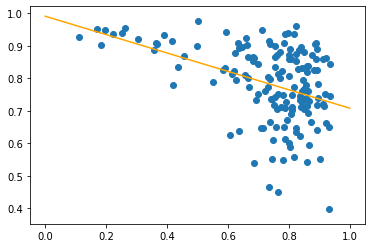

In [106]:
from sklearn.linear_model import LinearRegression

x = df_lr['Perceptions of corruption'].values
y=df_lr['Freedom to make life choices'].values

model = LinearRegression(fit_intercept = True)

model.fit(x.reshape(-1,1),y.reshape(-1,1))

xfit = np.linspace(0,1,10)
yfit = model.predict(xfit.reshape(10,1))

plt.scatter(x,y)
plt.plot(xfit,yfit,color='orange');

In [108]:
print("Coefficients: ",model.coef_[0], '\nintercept: ',model.intercept_)

Coefficients:  [-0.28250591] 
intercept:  [0.99047097]


In [110]:
model.score(x.reshape(-1,1),y.reshape(-1,1))

0.17652140497800195